In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv('Telco-Customer-churn.csv')

In [12]:
df.shape

(7043, 21)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
df['customerID'] = pd.to_numeric(df['customerID'], errors='coerce')
df['customerID'] = df['customerID'].fillna(0).astype(int)  
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [26]:
df.dtypes

customerID            int32
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

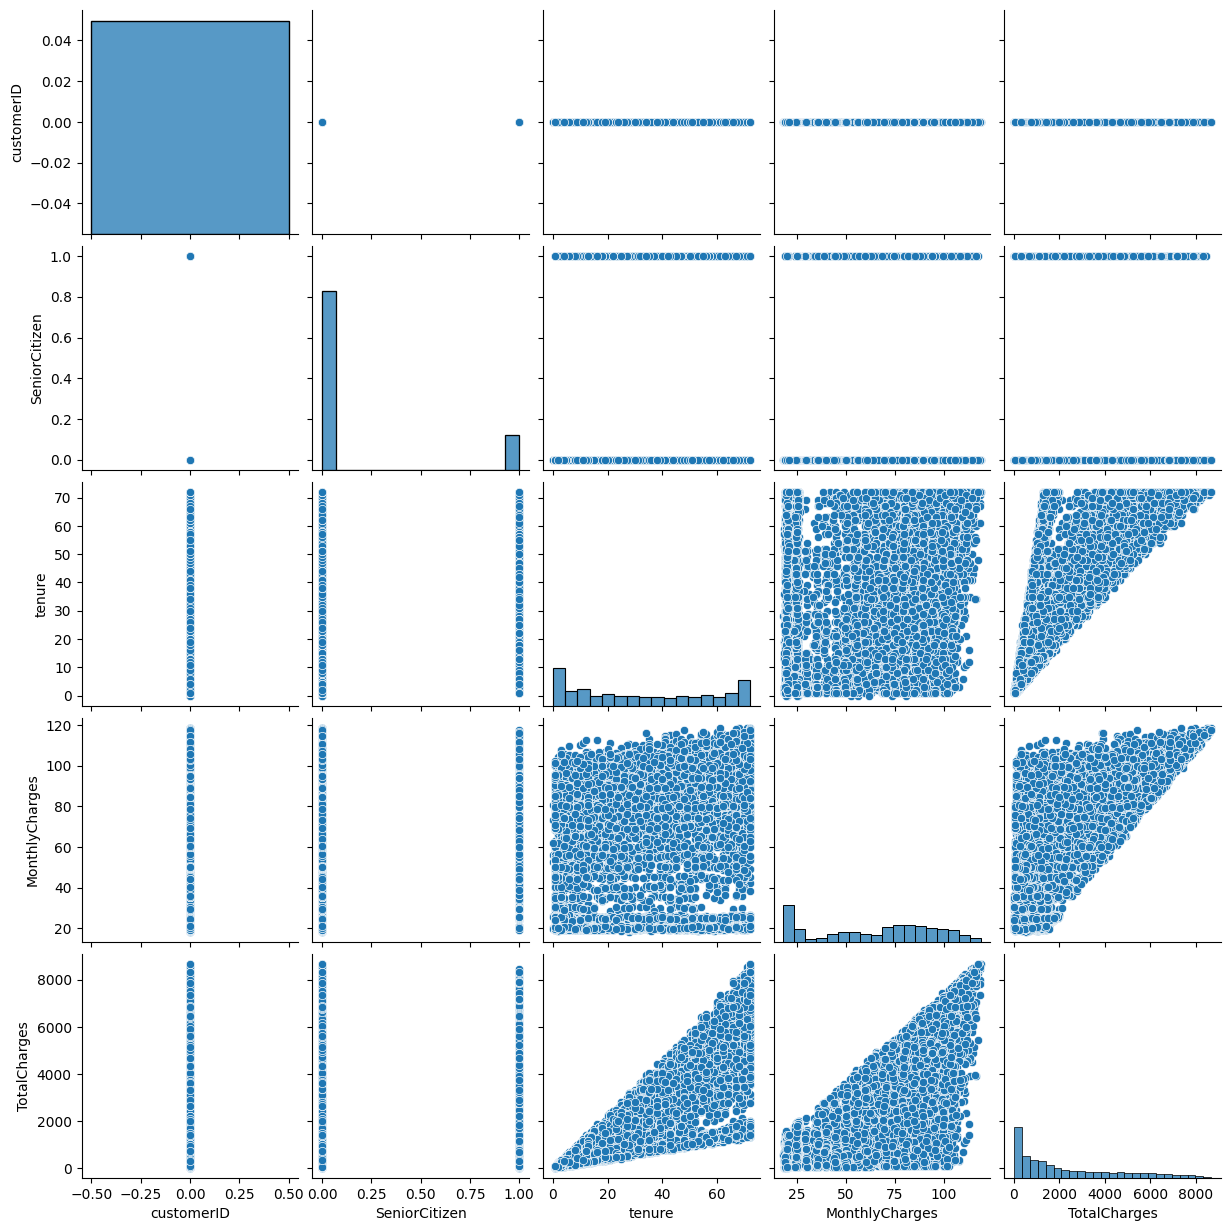

In [27]:
sns.pairplot(df)

<Axes: >

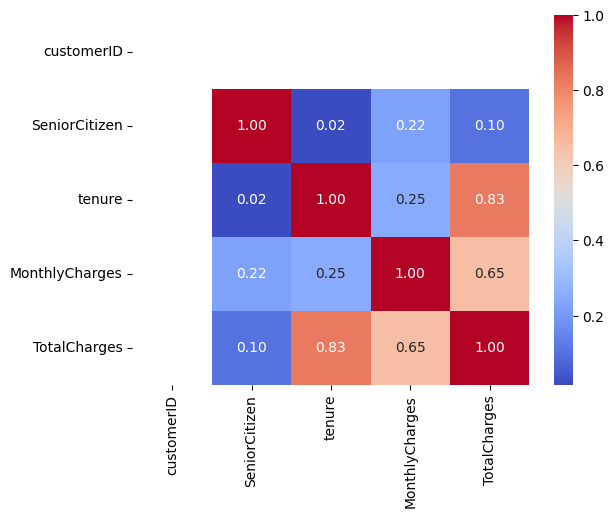

In [28]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [30]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

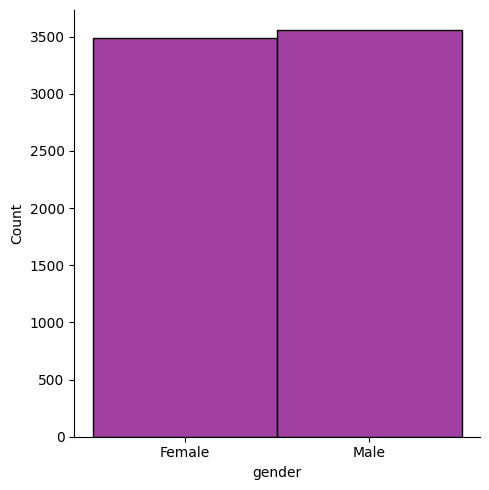

In [47]:
sns.displot(df['gender'], color='purple')

In [49]:
df['tenure'].value_counts().unique()

array([613, 362, 238, 200, 176, 170, 133, 131, 123, 119, 117, 116, 110,
       109, 100,  99,  98,  97,  95,  94,  90,  89,  88,  87,  85,  80,
        79,  76,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,
        63,  61,  60,  59,  57,  56,  51,  50,  11], dtype=int64)

In [63]:
bins = [0, 12, 24, 48, 72]
labels = ['<1 year', '1-2 years', '2-4 years', '>4 years']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels)


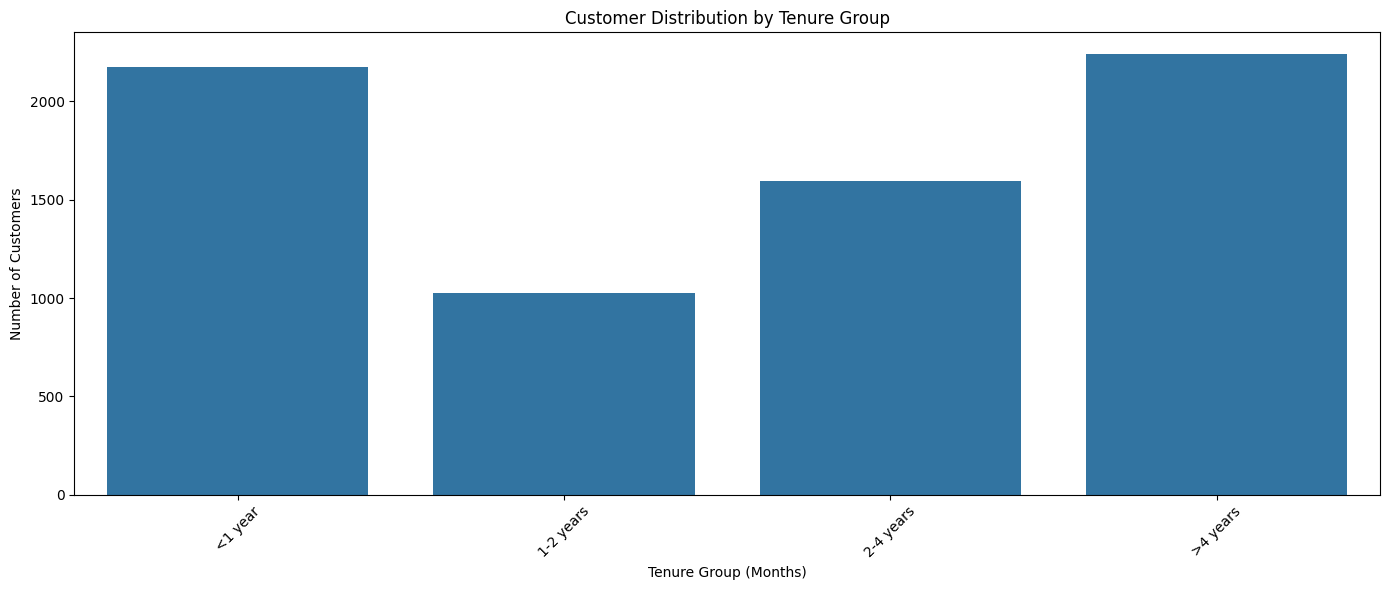

In [64]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='tenure_group')

plt.title('Customer Distribution by Tenure Group')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

In [67]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

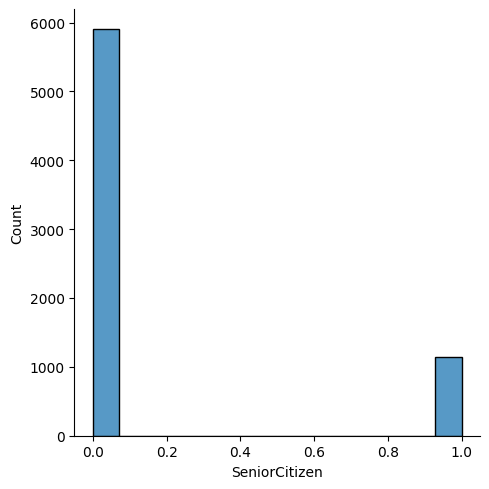

In [68]:
sns.displot(df['SeniorCitizen'])

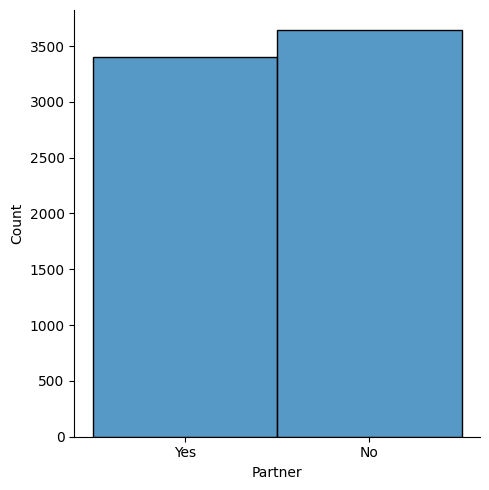

In [69]:
sns.displot(df['Partner'])

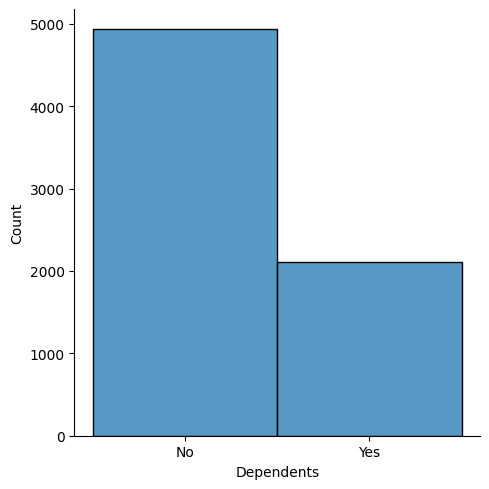

In [70]:
sns.displot(df['Dependents'])

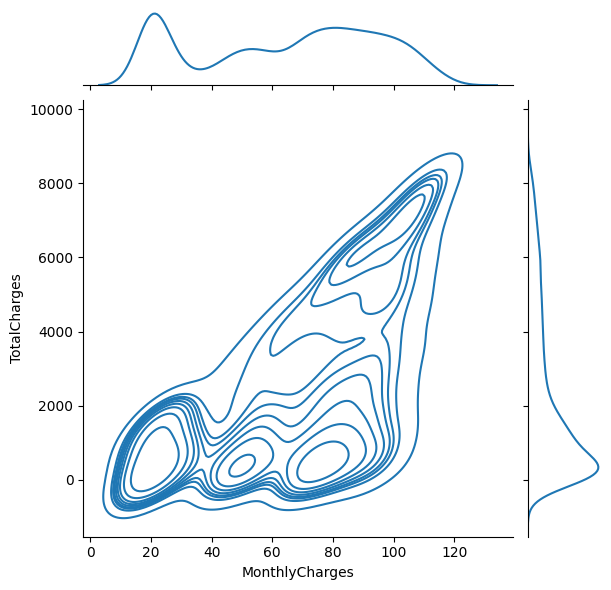

In [79]:
sns.jointplot(x="MonthlyCharges", y="TotalCharges",data= df, kind  = 'kde')

In [80]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')

<Axes: xlabel='count', ylabel='PhoneService'>

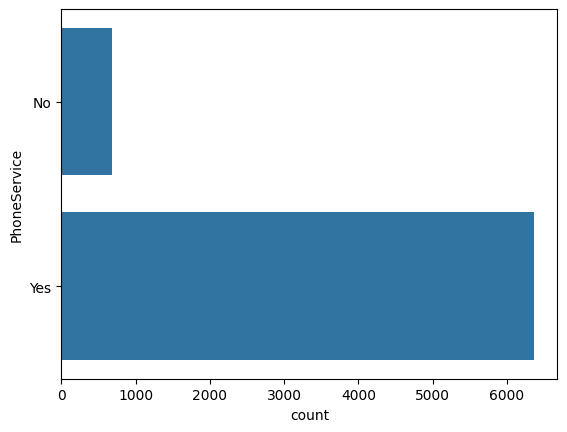

In [82]:
sns.countplot(df['PhoneService'])

<Axes: xlabel='count', ylabel='MultipleLines'>

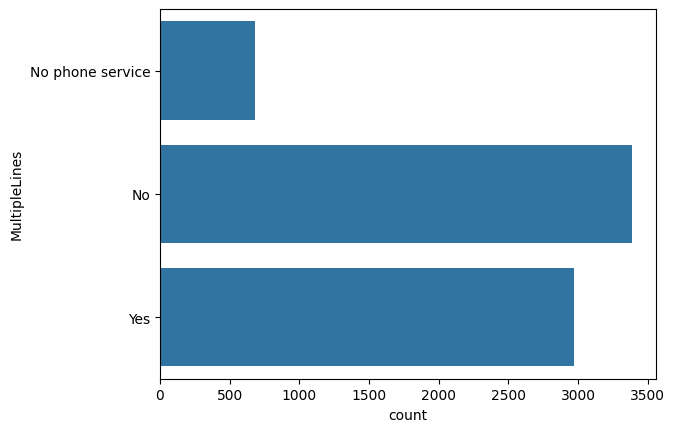

In [85]:
sns.countplot(df['MultipleLines'])

<Axes: xlabel='count', ylabel='InternetService'>

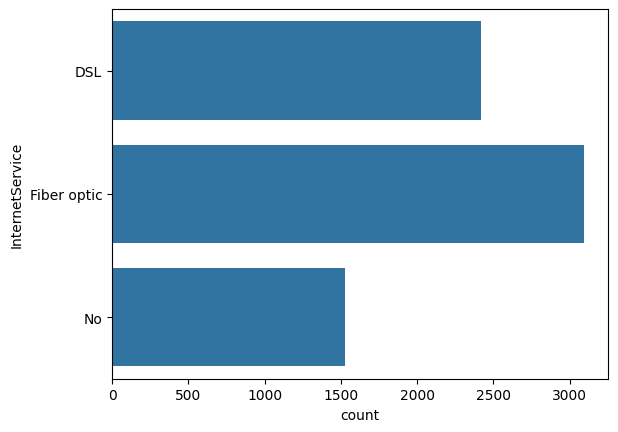

In [86]:
sns.countplot(df['InternetService'])

<Axes: xlabel='count', ylabel='OnlineSecurity'>

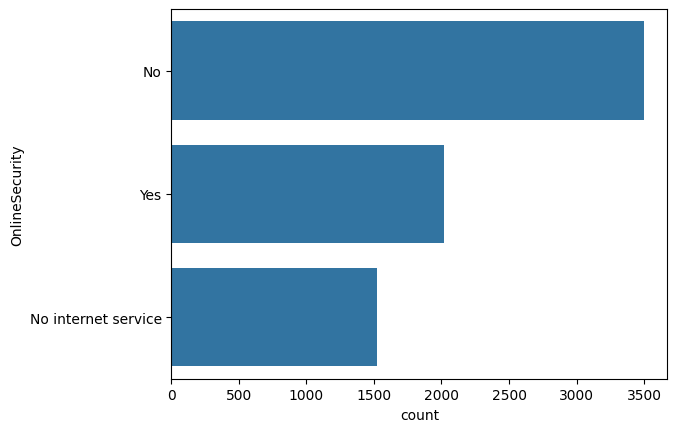

In [87]:
sns.countplot(df['OnlineSecurity'])

<Axes: xlabel='count', ylabel='DeviceProtection'>

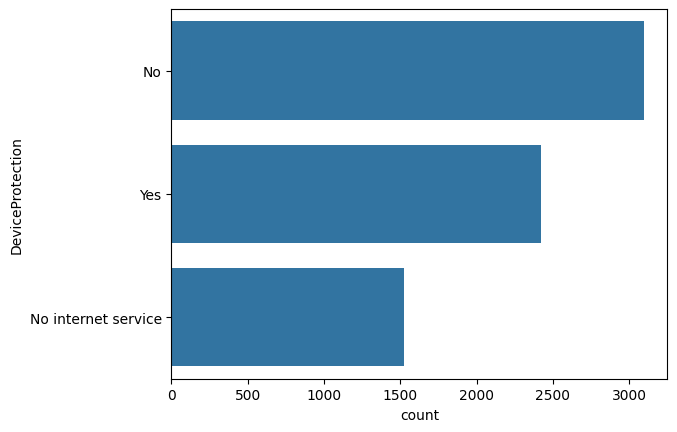

In [88]:
sns.countplot(df['DeviceProtection'])

<Axes: xlabel='count', ylabel='PaymentMethod'>

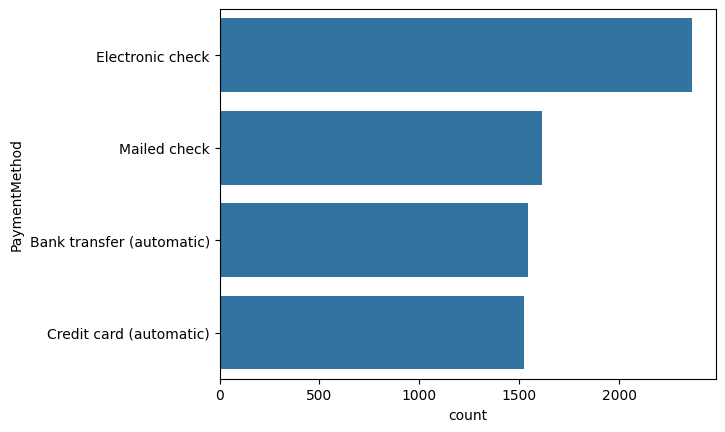

In [89]:
sns.countplot(df['PaymentMethod'])

<Axes: xlabel='StreamingTV', ylabel='count'>

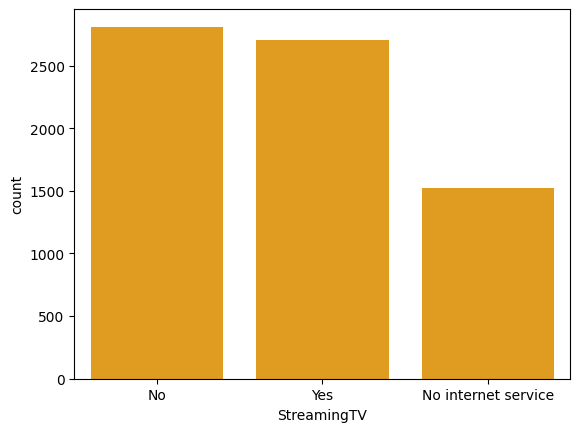

In [96]:
sns.countplot(data=df, x='StreamingTV',color= 'orange')

<Axes: xlabel='StreamingMovies', ylabel='count'>

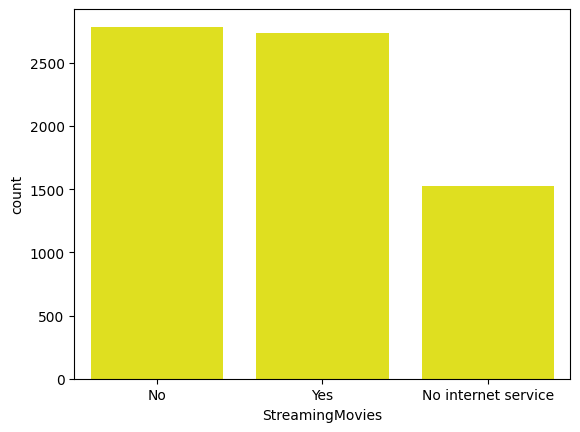

In [97]:
sns.countplot(data=df, x='StreamingMovies',color = 'yellow')

<Axes: >

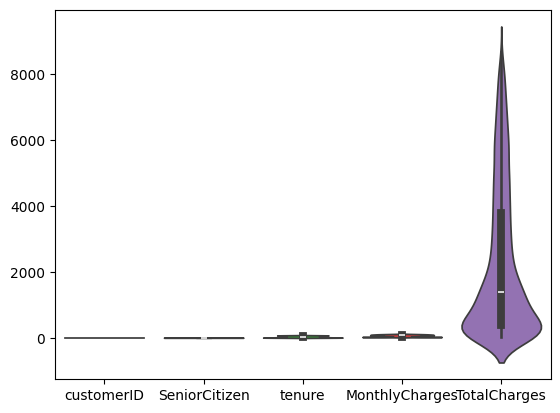

In [100]:
sns.violinplot( data = df)

<Axes: >

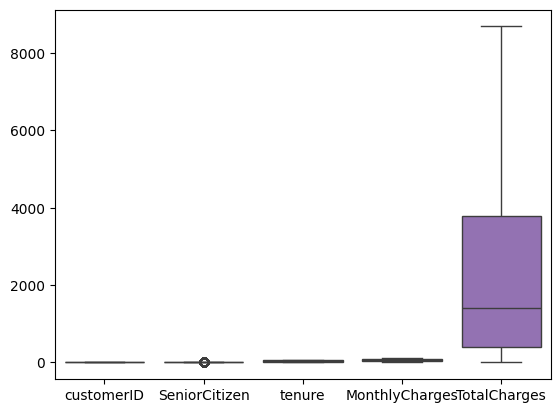

In [101]:
sns.boxplot( data = df)

In [102]:
df = df.drop(columns=['customerID'])

In [103]:
df['AvgChargesPerMonth'] = df['TotalCharges'] / df['tenure']

Text(-3.6805555555555554, 0.5, 'Frequency')

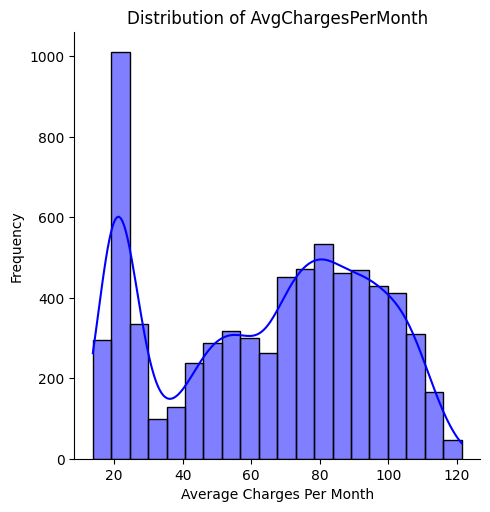

In [105]:
sns.displot(df['AvgChargesPerMonth'], kde=True, color='blue')
plt.title('Distribution of AvgChargesPerMonth')
plt.xlabel('Average Charges Per Month')
plt.ylabel('Frequency')

In [119]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [120]:
label_columns = ['SeniorCitizen', 'Partner', 'Dependents', 'Churn']
label_encoder = LabelEncoder()
for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [128]:
selected_features = [
    'tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod',
    'InternetService', 'TechSupport', 'OnlineSecurity', 'StreamingTV',
    'PaperlessBilling', 'SeniorCitizen', 'Partner'
]

df_encoded = pd.get_dummies(df[selected_features + ['Churn']], drop_first=True)

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [133]:
y_pred = rfc.predict(X_test)

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7935
Precision: 0.6427
Recall: 0.5020
F1-Score: 0.5637


Text(0.5, 1.0, 'Customer Churn - Confusion Matrix')

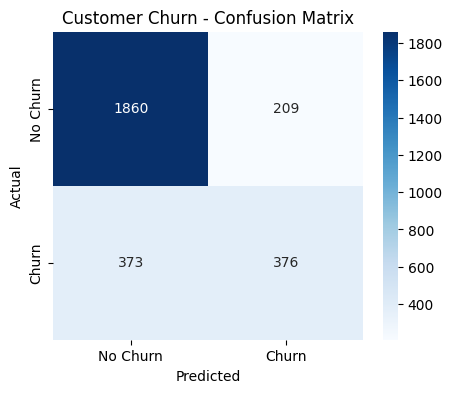

In [136]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No Churn", "Churn"], 
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Customer Churn - Confusion Matrix")

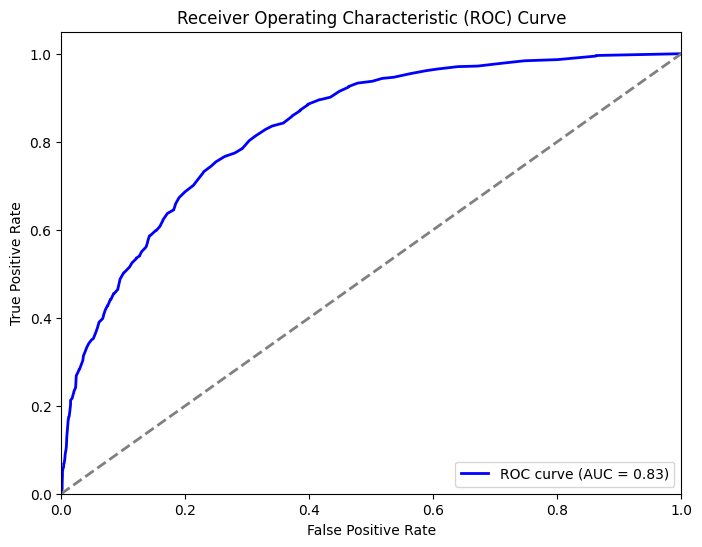

In [141]:
from sklearn.metrics import roc_curve, auc
y_prob = rfc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

In [139]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

joblib.dump(rfc, "customer_churn_model.pkl") 
joblib.dump(scaler, "scaler.pkl")    

['scaler.pkl']

In [140]:
loaded_model = joblib.load("customer_churn_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")